In [1]:
from tqdm.notebook import tqdm
from ModuleBfv import BFV, BfvConfig, get_error
from Polynomial import RingPoly
import matplotlib.pyplot as plt
from statistics import mean, median

In [27]:
conf = BfvConfig(4, 1, 2**60, 2**600)
op_count = []
errors = []
for j in tqdm(range(1000)):

    error_dev = []
    # Single Test Start
    sk, pk, rlks = BFV.keygen(conf)
    m1 = RingPoly.random_ring_poly(conf.poly_len, 0, 1)
    m_e1 = BFV.encrypt(conf, pk, rlks, m1)
    for i in range(10000):
        m2 = RingPoly.random_ring_poly(conf.poly_len, 0, 1)
        m_e2 = BFV.encrypt(conf, pk, rlks, m2)
        m_e1 = m_e1 * m_e2
        m1 = (m1 * m2) % 2
        error_dev.append(get_error(m_e1, m1, sk))
        # assert BFV.decrypt(sk, m_e1) == m1.poly_mat[0].tolist(), f"{i}: {m1} -- {BFV.decrypt(sk, m_e1)}"
        if BFV.decrypt(sk, m_e1) != m1:
            op_count.append(i)
            errors.append(error_dev)
            break

print("Mean Operations:", mean(op_count))
print("Median Operations:", median(op_count))

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean Operations: 24.488
Median Operations: 24.0


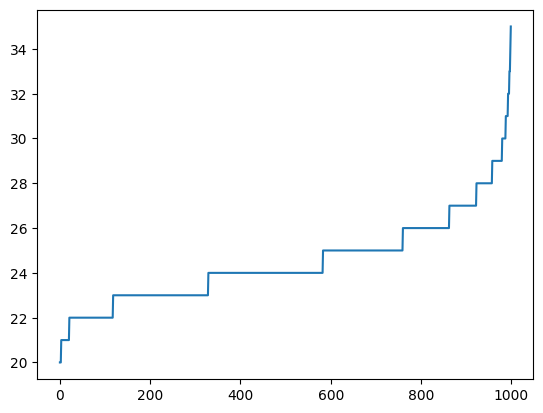

In [28]:
fig, ax = plt.subplots()
ax.plot(range(len(op_count)), sorted(op_count))
plt.show()

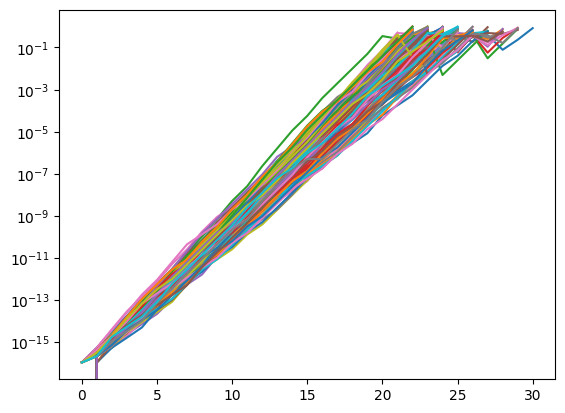

In [29]:
fig, ax = plt.subplots()
ax.set_yscale("log")
for i in range(100):
    ax.plot(range(len(errors[i])), errors[i])
plt.show()